In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude
Your final notebook must:

Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.
Save both a CSV of all data retrieved and png images for each scatter plot.
As final considerations:

You must complete your analysis using a Jupyter notebook.
You must use the Matplotlib or Pandas plotting libraries.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
See Example Solution for a reference on expected format.

# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from pprint import pprint
import sys
# Import API key
import api_keys 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
pprint(city)

'shilka'


In [29]:
api_key = api_keys.api_key

# Set query information - test with hardcoding 
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + 'tested with hardcoding key'

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Common cities
# https://www.worldatlas.com/articles/most-common-town-and-city-names-in-the-u-s-a.html

print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551


In [30]:
response = requests.get(f"{url}&q={city}").json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 51.85, 'lon': 116.03},
 'dt': 1548734693,
 'id': 2016708,
 'main': {'grnd_level': 945.7,
          'humidity': 50,
          'pressure': 945.7,
          'sea_level': 1036.38,
          'temp': 3.78,
          'temp_max': 3.78,
          'temp_min': 3.78},
 'name': 'Shilka',
 'sys': {'country': 'RU',
         'message': 0.0037,
         'sunrise': 1548720033,
         'sunset': 1548752274},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 325.5, 'speed': 8.41}}


In [6]:
# Make a list of all the qualified fields needed to be captured from API Call
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []

# Start a counter for the loop
counter = 1

# Identify start of file log
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#create a for loop to 

#?q={city name}



for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json()
        cityname.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        maxtemp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        windspeed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {counter} | {city_record}")
        print(f"{url}&q={city}")
        
        counter = counter + 1
        
        time.sleep(2.01)
        
    except:
        print("City not found.  Skipping......")


Beginning Data Retrieval
-------------------------------
City not found.  Skipping......
Processing Record 1 | Ejido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=ejido
Processing Record 2 | Harboore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=harboore
Processing Record 3 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=saint george
Processing Record 4 | Chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=chuy
Processing Record 5 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=busselton
Processing Record 6 | Nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=nome
Processing Record 7 | Alofi
http://api.openweathermap.org/data/2.

City not found.  Skipping......
Processing Record 57 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=tuktoyaktuk
Processing Record 58 | Stege
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=stege
City not found.  Skipping......
Processing Record 59 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=severo-kurilsk
Processing Record 60 | Shizunai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=shizunai
Processing Record 61 | Aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=aksarka
Processing Record 62 | Camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=camacha
Processing Record 63 | East London
http://api.openweathermap.org

Processing Record 111 | Adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=adrar
Processing Record 112 | Paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=paamiut
Processing Record 113 | Regente Feijo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=regente feijo
Processing Record 114 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=ilulissat
Processing Record 115 | Dalhousie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=dalhousie
Processing Record 116 | Santa Cruz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=santa cruz
Processing Record 117 | Hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d

Processing Record 166 | Barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=barrow
Processing Record 167 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=faanui
Processing Record 168 | Naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=naze
Processing Record 169 | Sidi Ali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=sidi ali
Processing Record 170 | Cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=cabedelo
Processing Record 171 | Navalmoral de la Mata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=navalmoral de la mata
City not found.  Skipping......
Processing Record 172 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing Record 220 | Falam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=falam
Processing Record 221 | Omboue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=omboue
Processing Record 222 | Cockburn Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=cockburn town
Processing Record 223 | Salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=salalah
Processing Record 224 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=lebu
Processing Record 225 | Hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=hualmay
Processing Record 226 | Kommunar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=kommun

Processing Record 276 | Batagay-Alyta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=batagay-alyta
Processing Record 277 | Okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=okhotsk
Processing Record 278 | Jutai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=jutai
Processing Record 279 | Nakhon Thai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=nakhon thai
City not found.  Skipping......
Processing Record 280 | Qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=qaqortoq
Processing Record 281 | Robstown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=robstown
Processing Record 282 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 331 | Daru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=daru
Processing Record 332 | Espanola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=espanola
Processing Record 333 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=constitucion
Processing Record 334 | Winnemucca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=winnemucca
Processing Record 335 | Havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=havoysund
Processing Record 336 | Loikaw
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=loikaw
Processing Record 337 | Hay River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8

City not found.  Skipping......
Processing Record 387 | Oranjestad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=oranjestad
City not found.  Skipping......
Processing Record 388 | Bouake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=bouake
Processing Record 389 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=ponta do sol
Processing Record 390 | Umm Lajj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=umm lajj
Processing Record 391 | Springdale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=springdale
City not found.  Skipping......
Processing Record 392 | Laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=laguna
Processing Record 393 | Ma

Processing Record 441 | Oistins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=oistins
Processing Record 442 | Pacifica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=pacifica
Processing Record 443 | Alice Springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=alice springs
Processing Record 444 | Novikovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=novikovo
Processing Record 445 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=vila franca do campo
Processing Record 446 | Kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=kudahuvadhoo
City not found.  Skipping......
Processing Record 447 | Hirara
http://api.openweathermap.o

Processing Record 496 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=beringovskiy
Processing Record 497 | Xuddur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=xuddur
Processing Record 498 | Naron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=naron
Processing Record 499 | Balogo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=balogo
City not found.  Skipping......
Processing Record 500 | Riohacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=riohacha
Processing Record 501 | Santa Marta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23db6aad30a234dabef08d5af8540551&q=santa marta
City not found.  Skipping......
Processing Record 502 | Yacuiba
http://api.openweathermap.org/data

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a dictonary to create data frame
weatherpy_dict = {
    "City": cityname,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": maxtemp,
    "Wind Speed":windspeed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          528
Cloudiness    528
Country       528
Date          528
Humidity      528
Lat           528
Lng           528
Max Temp      528
Wind Speed    528
dtype: int64

In [19]:
# Save data frame to CSV
weather_data.to_csv('Output/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ejido,44,VE,1548731521,91,8.55,-71.24,58.05,1.59
1,Harboore,36,DK,1548730200,92,56.62,8.18,21.20,3.36
2,Saint George,40,GR,1548730200,93,39.45,22.34,44.60,6.93
3,Chuy,44,UY,1548731528,93,-33.69,-53.46,75.69,7.63
4,Busselton,20,AU,1548731530,93,-33.64,115.35,69.93,11.77


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

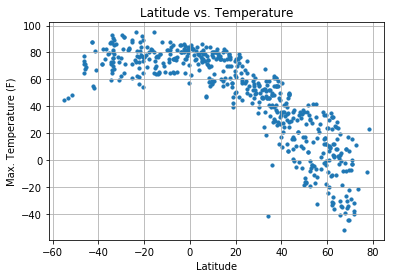

In [20]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

plt.title("Latitude vs. Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output/Max_Temp_vs_Latitude.png")

plt.show()

#### Latitude vs. Humidity Plot

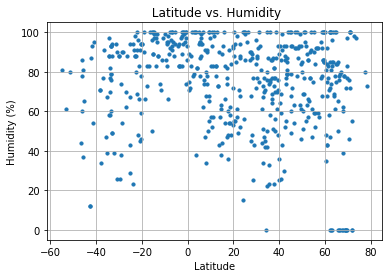

In [22]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

plt.title(" Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output/Humidity_vs_Latitude.png")

plt.show()

#### Latitude vs. Cloudiness Plot

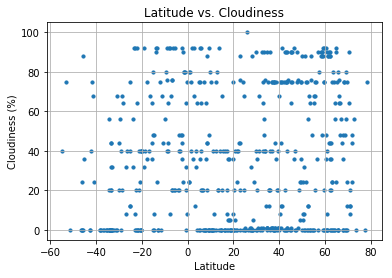

In [24]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output/Cloudiness_vs_Latitude.png")

plt.show()

#### Latitude vs. Wind Speed Plot

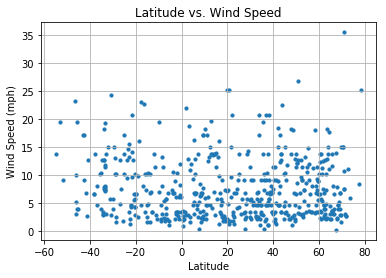

In [25]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output/Wind_Speed_vs_Latitude.png")


plt.show()